In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ann-car-sales-price-prediction/car_purchasing.csv


In [25]:
#df = pd.read_csv('/kaggle/input/ann-car-sales-price-prediction/car_purchasing.csv')
df = pd.read_csv('/kaggle/input/ann-car-sales-price-prediction/car_purchasing.csv',encoding='latin-1')
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [26]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing  ## New dataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

# DL_
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from sklearn.metrics import r2_score

In [28]:

df.dropna(inplace=True)
df.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [29]:
df.duplicated().sum()

0

In [30]:
df.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['country'] = le.fit_transform(df['country'])   ## 01 Encoding: labelEncoding

In [32]:
df

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,27,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,17,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,1,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,41,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,26,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,128,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,208,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,144,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,24,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [33]:
dfs= df.drop(columns=['customer name', 'customer e-mail'], inplace=True)

In [36]:
df

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,27,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,17,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,41,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,26,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...
495,128,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,208,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,144,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,24,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [37]:
x = df.drop(columns=['car purchase amount'], inplace=False) 
y = df['car purchase amount']

In [41]:
x

,country,gender,age,annual Salary,credit card debt,net worth
0,27,0,41.851720,62812.09301,11609.380910,238961.2505
1,17,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,1,43.152897,53798.55112,11160.355060,638467.1773
3,41,1,58.271369,79370.03798,14426.164850,548599.0524
4,26,1,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...,...
495,128,0,41.462515,71942.40291,6995.902524,541670.1016
496,208,1,37.642000,56039.49793,12301.456790,360419.0988
497,144,1,53.943497,68888.77805,10611.606860,764531.3203
498,24,1,59.160509,49811.99062,14013.034510,337826.6382


In [42]:
# 01 code:StandardScaler();
from sklearn.preprocessing import StandardScaler
sacler = StandardScaler(); 
x = sacler.fit_transform(x)    ## 01 Same Model With Scaling 
x # now x is array


array([[-1.25451191, -1.01207287, -0.55074911,  0.05857619,  0.57427133,
        -1.11046945],
       [-1.42027285, -1.01207287, -0.67383422,  0.38657041, -0.0099515 ,
         0.57392937],
       [-1.68549034,  0.98807114, -0.38750768, -0.71236095,  0.4454518 ,
         1.19397625],
       ...,
       [ 0.68489103,  0.98807114,  0.96624515,  0.57832106,  0.28802326,
         1.92114437],
       [-1.30424019,  0.98807114,  1.62075409, -1.05333541,  1.26384749,
        -0.54019026],
       [ 1.76233711,  0.98807114,  0.06140832, -0.06470949, -0.06205457,
         0.18153098]])

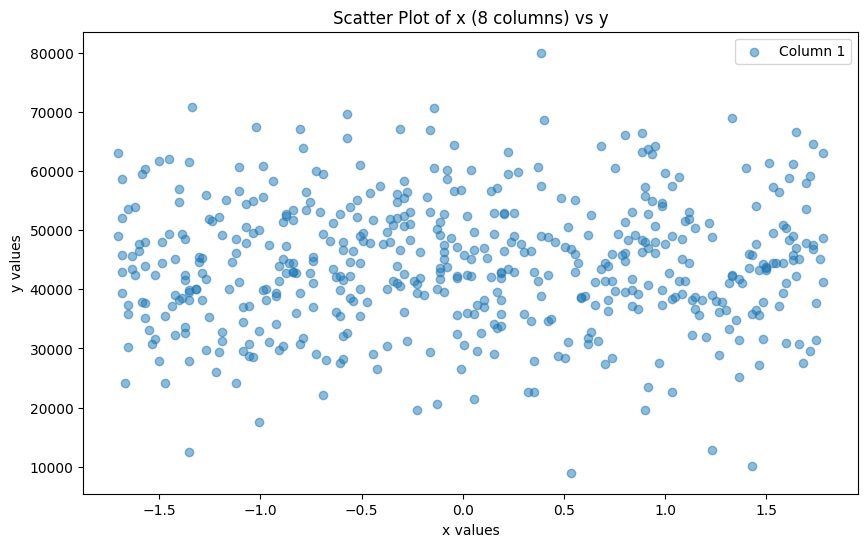

In [44]:
# Generate random data for x (16000 rows, 8 columns) and y (16000 values)
x = x #np.random.rand(16000, 8)
y = y #np.random.rand(16000)

# Plot the scatter for each column in x against y
plt.figure(figsize=(10, 6))
for i in range(1):
    plt.scatter(x[:, i], y, label=f'Column {i+1}', alpha=0.5)

plt.title('Scatter Plot of x (8 columns) vs y')
plt.xlabel('x values')
plt.ylabel('y values')
plt.legend()
plt.show()

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [50]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1))

In [55]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=50, batch_size=50, validation_split=0.2)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 31625778.0000 - val_loss: 23724886.0000
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 29506176.0000 - val_loss: 23254100.0000
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 27955436.0000 - val_loss: 22122466.0000
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 25266690.0000 - val_loss: 21176512.0000
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 27059804.0000 - val_loss: 20049508.0000
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 26687720.0000 - val_loss: 19249300.0000
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24323690.0000 - val_loss: 18470814.0000
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22493652.0000 - val_loss: 17971238.0000
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23690980.0000 - val_loss: 17467602.0000
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23754740.0000 - val_loss: 16934620.0000
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0

In [56]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,741 (127.90 KB)

 Trainable params: 10,913 (42.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 21,828 (85.27 KB)

None


In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Evaluate the model (MSE is already computed via Keras)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss}")

# Predict on test data
y_pred = model.predict(X_test)

# Calculate additional metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Test Loss (MSE): 6065092.0
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Mean Squared Error (MSE): 6065091.636028074
Root Mean Squared Error (RMSE): 2462.7406757570056
Mean Absolute Error (MAE): 2023.6921686875
R-squared (R²): 0.9438277840224776


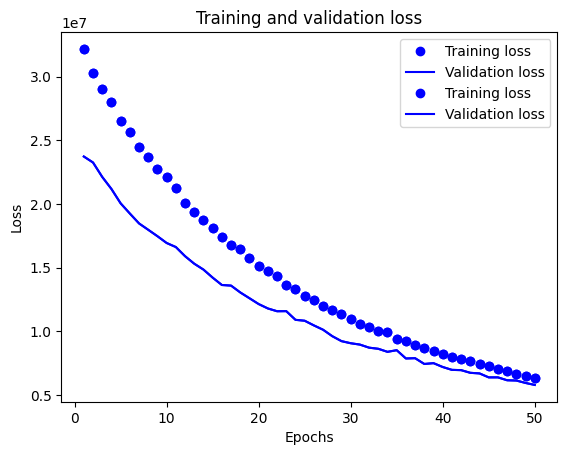

In [58]:
# Extract the history of the training process
history_dict = history.history  # Contains the recorded metrics for each epoch during training

# Retrieve the loss values for training and validation from the history
loss_values = history_dict['loss']        # List of loss values for each epoch (training loss)
val_loss_values = history_dict['val_loss'] # List of validation loss values for each epoch

# Create a range of epochs based on the number of loss values
epochs = range(1, len(loss_values) + 1)  # A range from 1 to the number of epochs

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()



# 4. Plot the training and validation loss values over epochs
plt.plot(epochs, loss_values, 'bo', label='Training loss')  # 'bo' means blue dots for training loss
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')  # 'b' means a solid blue line for validation loss

# 5. Set the title and labels for the plot
plt.title('Training and validation loss')  # Title of the plot
plt.xlabel('Epochs')  # Label for the x-axis
plt.ylabel('Loss')    # Label for the y-axis

# 6. Display the legend to show which line represents training vs validation
plt.legend()  # Display the legend based on the labels provided in the plot

# 7. Show the plot
plt.show()  # Render the plot